# VGG16

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.23.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
bayesian-optimization 2.0.3 requires numpy>=1.25, but you have numpy 1.23.4 which is incompatible.
bigframes 1.29.0 requires numpy>=1.24.0, but you have numpy 1.23.4 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.4 which is incompatible.
featuretools 1.31.0 requires numpy>=1.25.0, but you have numpy 1.23.4 which is incompatible.
jax 0.4.33 requires numpy>=1.24, 

In [5]:
import splitfolders

splitfolders.ratio("/kaggle/input/cat-dog/PetImages", output="Final", 
                  seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:08,  8.85s/ files]
Copying files: 94 files [00:08, 14.89 files/s]
Copying files: 183 files [00:09, 34.31 files/s]
Copying files: 287 files [00:09, 65.20 files/s]
Copying files: 374 files [00:09, 98.94 files/s]
Copying files: 460 files [00:09, 141.99 files/s]
Copying files: 567 files [00:09, 211.26 files/s]
Copying files: 659 files [00:09, 279.59 files/s]
Copying files: 751 files [00:09, 354.43 files/s]
Copying files: 842 files [00:09, 433.08 files/s]
Copying files: 934 files [00:09, 516.09 files/s]
Copying files: 1027 files [00:09, 597.07 files/s]
Copying files: 1128 files [00:10, 687.70 files/s]
Copying files: 1222 files [00:10, 744.96 files/s]
Copying files: 1326 files [00:10, 818.89 files/s]
Copying files: 1430 files [00:10, 876.37 files/s]
Copying files: 1529 files [00:10, 867.75 files/s]
Copying files: 1624 files [00:10, 889.90 files/s]
Copying files: 1719 files [00:10, 874.84 files/s]
Copying files: 1811 files 

In [6]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
#import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2.17.1


In [7]:
train_path=("/kaggle/working/Final/train")
val_path=("/kaggle/working/Final/val")
test_path=("/kaggle/working/Final/test")
batch_size = 32
img_height = 640
img_width = 640
no_of_clases = 2
clsses_name = ['Cat','Dog']
input_shape = (img_height,img_width,1)

datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,horizontal_flip=False,vertical_flip = False,validation_split = 0.1,featurewise_std_normalization = True)

train_generator = datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(val_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 19998 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.
train classes
{'Cat': 0, 'Dog': 1}
train labels
[0 0 0 ... 1 1 1]
validation clases
{'Cat': 0, 'Dog': 1}
validation labels
[0 0 0 ... 1 1 1]


In [8]:
print(len(train_generator))

625


In [10]:
pretrained_model = tf.keras.applications.VGG16(
                    input_shape=(640, 640, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
inputs = pretrained_model.input
outputs1 = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model.output)
dropout = tf.keras.layers.Dropout(0.5)(outputs1)
output2 = tf.keras.layers.Dense(1024,activation = 'relu')(dropout)
dropout2 = tf.keras.layers.Dropout(0.5)(output2)
outputs = tf.keras.layers.Dense(2,activation = 'softmax')(dropout2)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 640, 640, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 640, 640, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 320, 320, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 320, 320, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 320, 320, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 160, 160, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 160, 160, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 160, 160, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 160, 160, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 80, 80, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 80, 80, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 80, 80, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 80, 80, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 40, 40, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 20, 20, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,291,650 (62.15 MB)

 Trainable params: 1,576,962 (6.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/625 ━━━━━━━━━━━━━━━━━━━━ 14:59:06 86s/step - accuracy: 0.3125 - loss: 1.0941

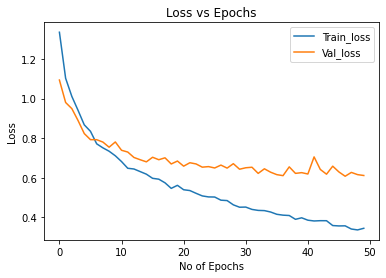

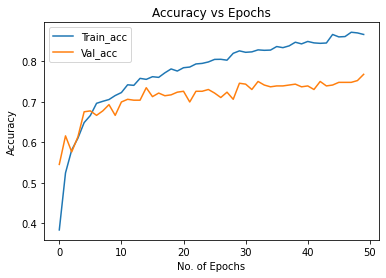

In [10]:
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


plt.plot(history.history['accuracy'],label = 'Train_acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [11]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(test_path, target_size=(640, 640), batch_size=32, shuffle=False, class_mode="categorical")

Found 459 images belonging to 4 classes.


In [12]:
predictions = np.argmax(model.predict(test_generator), axis=1)
matrix = confusion_matrix(test_generator.labels, predictions)
report = classification_report(test_generator.labels, predictions, zero_division=0)

In [13]:
pred = model.predict(test_generator,verbose=1)
test_generator_indices = np.argmax(pred,axis=1)

print(test_generator_indices)

15/15 [==============================] - 7s 473ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 2 3 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 1 1 1 1 3
 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1 1 2 0 1 1 1 1 1 1 1 3 3 1 3 1 1
 1 1 0 2 1 2 1 1 1 1 3 1 1 1 1 1 1 0 1 2 1 1 2 3 1 1 1 1 2 1 1 1 1 2 2 1 1
 1 1 1 3 1 1 1 1 1 2 2 2 3 2 2 2 3 2 1 2 1 0 2 2 2 1 2 3 1 2 2 2 2 1 2 1 1
 2 1 1 3 2 2 2 3 1 2 2 2 2 2 2 2 2 0 3 2 1 1 3 2 2 2 1 1 2 1 1 1 3 2 3 1 2
 3 1 2 3 2 3 1 3 3 3 2 2 3 2 2 2 3 2 2 1 3 2 3 3 2 3 2 1 3 3 1 3 2 1 3 2 3
 2 2 2 3 2 3 2 3 2 2 3 3 2 3 3 2 3 1 1 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 1 3 3 3 2 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 2 3 3 3 3 3 3 3 3 3 2 3]


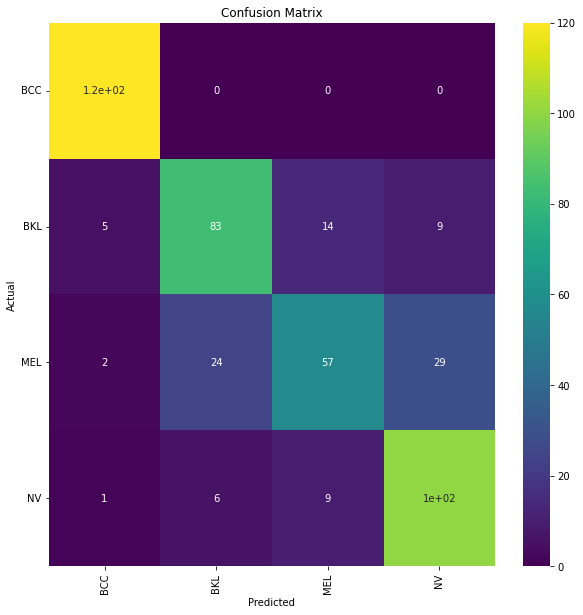

In [14]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(4) + 0.5, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=test_generator.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [15]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       120
           1       0.73      0.75      0.74       111
           2       0.71      0.51      0.59       112
           3       0.72      0.86      0.79       116

    accuracy                           0.78       459
   macro avg       0.78      0.78      0.77       459
weighted avg       0.78      0.78      0.78       459

